In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv("./financial_stock_data.csv", parse_dates=["Date"])

In [57]:
df.head()

,Date,Expenses,Money_In,Total_Money,Money_Spent,Money_Left,Stock_On_Hand,Stock_To_Order
0,2024-01-01,427,428,10428,427,10001,125,479
1,2024-01-02,240,701,10702,240,10462,328,0
2,2024-01-03,171,409,10871,171,10700,792,0
3,2024-01-04,479,1316,12016,479,11537,189,402
4,2024-01-05,316,265,11802,316,11486,130,147


In [58]:
df["Day"] = df["Date"].dt.day
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [59]:
df["Month"].value_counts()

Month
1     93
3     93
5     93
7     93
8     93
4     90
6     90
9     86
2     85
10    62
12    62
11    60
Name: count, dtype: int64

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df.head()

,Date,Expenses,Money_In,Total_Money,Money_Spent,Money_Left,Stock_On_Hand,Stock_To_Order,Day,Year,Month
0,2024-01-01,427,428,10428,427,10001,125,479,1,2024,1
1,2024-01-02,240,701,10702,240,10462,328,0,2,2024,1
2,2024-01-03,171,409,10871,171,10700,792,0,3,2024,1
3,2024-01-04,479,1316,12016,479,11537,189,402,4,2024,1
4,2024-01-05,316,265,11802,316,11486,130,147,5,2024,1


In [62]:
df.head()

,Date,Expenses,Money_In,Total_Money,Money_Spent,Money_Left,Stock_On_Hand,Stock_To_Order,Day,Year,Month
0,2024-01-01,427,428,10428,427,10001,125,479,1,2024,1
1,2024-01-02,240,701,10702,240,10462,328,0,2,2024,1
2,2024-01-03,171,409,10871,171,10700,792,0,3,2024,1
3,2024-01-04,479,1316,12016,479,11537,189,402,4,2024,1
4,2024-01-05,316,265,11802,316,11486,130,147,5,2024,1


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop(["Money_Left", "Date"], axis=1)
y = df["Money_Left"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [65]:
len(df)

1000

In [66]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

In [67]:
xgb = XGBRegressor()

In [68]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
y_preds = xgb.predict(X_test)

In [70]:
mean_squared_log_error(y_test, y_preds)

0.0003833312933695493

<Axes: title={'center': 'Model Prediction vs Actual Prediction'}, xlabel='Actual', ylabel='Predicted'>

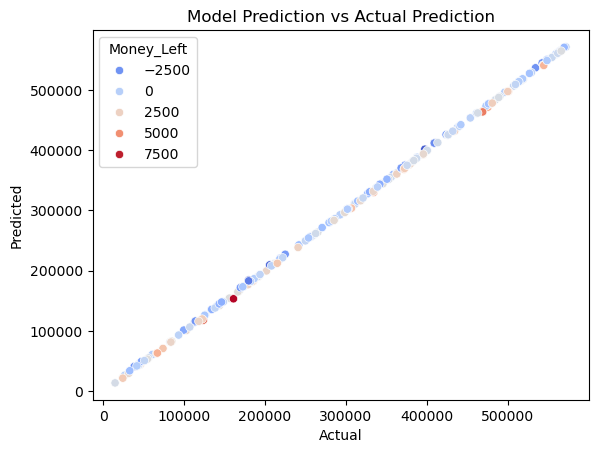

In [81]:
residuals = y_test - y_preds

plt.title("Model Prediction vs Actual Prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")

sns.scatterplot(x=y_test, y=y_preds, hue=residuals, palette="coolwarm")

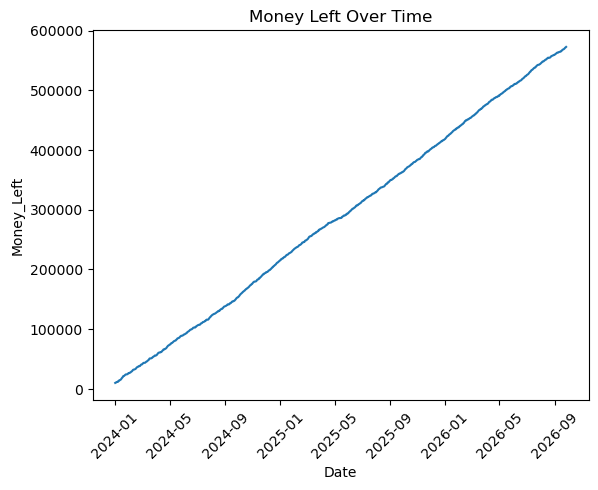

In [ ]:
sns.lineplot(x=df["Date"], y=df["Money_Left"])
plt.xticks(rotation=45)
plt.title("Money Left Over Time")

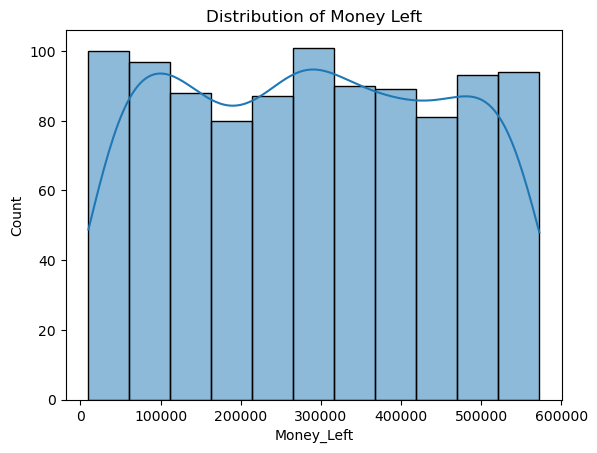

In [ ]:
sns.histplot(df["Money_Left"], kde=True)
plt.title("Distribution of Money Left")

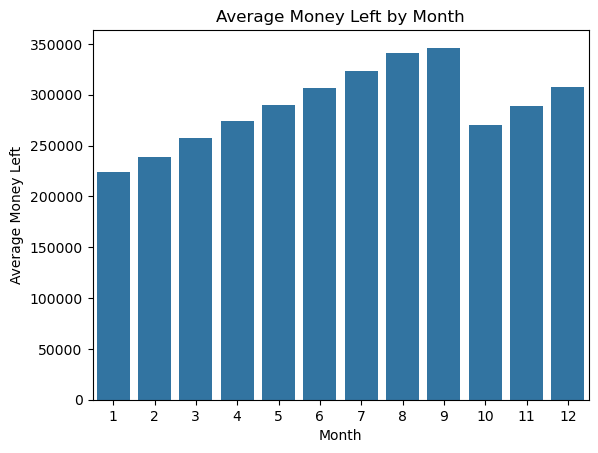

In [ ]:
monthly_average = df.groupby("Month")["Money_Left"].mean()
sns.barplot(x=monthly_average.index, y=monthly_average.values)
plt.title("Average Money Left by Month")
plt.xlabel("Month")
plt.ylabel("Average Money Left")